# Spam detection with the Logistic Regression

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
# get the data directly from github
url = 'https://raw.githubusercontent.com/BI-DS/EBA-3530/main/Lecture_2/spam.csv'
df = pd.read_csv(url, delimiter=',')

# print no. of rows and columns
print(df.shape)

# print a summary of the data
print(df.head(5))

# print variable names 
print(list(df))

(4601, 58)
   word_make  word_address  word_all  word_3d  word_our  word_over  \
0          0             1         1        0         1          0   
1          1             1         1        0         1          1   
2          1             0         1        0         1          1   
3          0             0         0        0         1          0   
4          0             0         0        0         1          0   

   word_remove  word_internet  word_order  word_mail  ...  char_semicolon  \
0            0              0           0          0  ...               0   
1            1              1           0          1  ...               0   
2            1              1           1          1  ...               1   
3            1              1           1          1  ...               0   
4            1              1           1          1  ...               0   

   char_leftbrac  char_leftsquarebrac  char_exclaim  char_dollar  char_pound  \
0              0         

## Data visualization

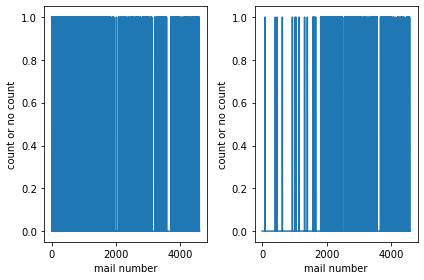

In [3]:
fig, ax = plt.subplots(1,2)
num_mails = np.linspace(0,df.shape[0], num=df.shape[0])

ax[0].step(num_mails, df.word_free)
ax[0].set(xlabel='mail number')
ax[0].set(ylabel='count or no count')

ax[1].step(num_mails, df.word_meeting)
ax[1].set(xlabel='mail number')
ax[1].set(ylabel='count or no count')
fig.tight_layout()
plt.show()

## Simple Logistic regression

In [4]:
# Use statsmodels in python

# get y variable and x variables
y = df.spam
# get all variables, but y, to fit a logistic regression
x = df.drop(columns=['spam']).copy()

# add an intercept term beta_0
x = sm.add_constant(x)


In [6]:
logistic_regression = sm.Logit(y, x).fit()
print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.168296
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4543
Method:                           MLE   Df Model:                           57
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.7490
Time:                        21:55:27   Log-Likelihood:                -774.33
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.9682      0.147    -13.429      0.000     

In [7]:
results = pd.read_html(logistic_regression.summary().tables[1].as_html(),header=0,index_col=0)[0]

In [8]:
results

,coef,std err,z,P>|z|,[0.025,0.975]
const,-1.9682,0.147,-13.429,0.000,-2.256000,-1.681
word_make,-0.5530,0.236,-2.346,0.019,-1.015000,-0.091
word_address,-0.1339,0.222,-0.604,0.546,-0.568000,0.301
word_all,-0.4946,0.178,-2.786,0.005,-0.843000,-0.147
word_3d,0.8302,0.824,1.007,0.314,-0.786000,2.446
word_our,1.1253,0.174,6.471,0.000,0.784000,1.466
word_over,0.2751,0.222,1.238,0.216,-0.160000,0.711
word_remove,2.4881,0.276,9.013,0.000,1.947000,3.029
word_internet,0.9334,0.252,3.702,0.000,0.439000,1.428
word_order,0.2196,0.277,0.793,0.428,-0.323000,0.762


In [21]:

word_free_coeff = results['coef'][results['coef'].index=='word_free'].values[0]
CI_LB = results['[0.025'][results['coef'].index=='word_free'].values[0]
CI_UB = results['0.975]'][results['coef'].index=='word_free'].values[0]
# Remember the log odds: log(p/(1-p)), meaning that the odds of an event
# are the probabilities that it happend over the probability that it does
# not. 

# The coefficients here are related to the log odds:
# log(p/(1-p)) = x'B where B are the coefficients and p the probablity for
# spam and 1-p the probability for not spam
# The odds of spam when the word_free occurs
print('The odds for spam increases {0:.1f} times that its coefficient '\
      'is {1:.4f} with confidence interval between {2:.4f} and {3:.4f}'\
      .format(np.exp(word_free_coeff), word_free_coeff, CI_LB, CI_UB))
# I.e., the odds of spam increases almost 5 times if the mail contains the
# word spam!

The odds for spam increases 4.7 times that its coefficient is 1.5427 with confidence interval between 1.1920 and 1.8930


In [ ]:
# prediction for mail number 1 and 4000
# i.e. p(y|x)=exp(x'B)/(1+exp(x'B))
logistic_regression.predict(x)[[0,3999]]

0       0.883907
3999    0.150999
dtype: float64

In [ ]:
# one parameter logistic regression
x = df.word_free
logistic_regression = sm.Logit(y, x).fit()
print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.642296
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4600
Method:                           MLE   Df Model:                            0
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                 0.04210
Time:                        11:19:28   Log-Likelihood:                -2955.2
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
word_free      1.3673      0.071     19.376      0.000       1.229       1.506
